📚 Project Overview: Student Habits & Academic Performance

Introduction.

This project explores how various lifestyle habits influence academic outcomes in students. Using a simulated dataset of 1,000 students, the goal is to uncover patterns and correlations between behaviors like studying, sleeping, screen time, and physical activity — and their impact on exam performance and mental health.

The dataset is from Kaggle: Student Habits vs Academic Performance.

Table of contents

Asking Questions
Data Wrangling
Exploratory Data Analysis
Conclusions

Asking Questions: 

Based on dataset we are interested to know: 

Q1: Are students who study more performing better? 
Q2: Is regular class attendance linked to higher performance? 
Q3: Does getting more sleep correlate with better mental health?
Q4: Are higher screen time habits linked to lower performance?
Q5: Do students with better health habits score higher?
Q6: Is physical activity associated with well-being?
Q7: Are there noticeable trends in study habits or scores by gender?
Q8: Do students with highly educated parents perform better?
Q9: Identify groups like “high achievers,” “distracted students,” or “balanced lifestyle”.

Data Wrangling

We will set up the environment, import and evaluate the dataset. Then, we will refine and prepare the data for analysis.

Preparing the enviroment:

In [45]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib as plt
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import pointbiserialr
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Import CSV
file_path = r"D:\Github Project\student_habits_performance.csv"
df = pd.read_csv(file_path)

Assess Data 

In this step, we view the dataset and get the basic information. 

In [31]:
#View first 3 rows
print("\nFirst 5 rows of the DataFrame:")
print(df.head(3))


First 5 rows of the DataFrame:
  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   

   mental_health_rating extracurricular_participation  exam_score  
0                

In [33]:
# Basic information of dataset
print("DataFrame Info:")
print(df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               10

In [35]:
#Check for duplicates
df.duplicated().sum()

0

In [37]:
print("\nBasic Statitics:")
print(df.describe())


Basic Statitics:
             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min                56.000000     3.20

Exploratory Analysis:

Q1: Are students who study more performing better? 

Lets analyze the study hours per day and the exam score.

In [40]:
corr = round(df["study_hours_per_day"].corr(df["exam_score"]),2)
print(corr)

0.83


A correlation coefficient of 0.83 between hours of study and exam score indicates a strong positive relationship. The value 0.83 is close to 1, showing a strong correlation. This means that as the hours of study increase, the exam scores tend to increase as well.

Text(0.5, 1.0, 'Study Hours vs Exam Score (r = 0.83)')

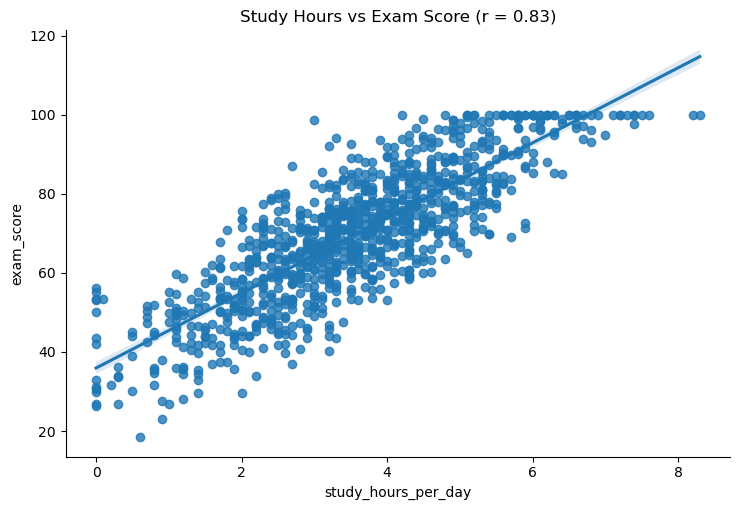

In [53]:
# Study Hours vs Exam Score
sns.lmplot(x='study_hours_per_day', y='exam_score', data=df, height=5, aspect=1.5)
plt.title('Study Hours vs Exam Score (r = 0.83)')

Q2: Is regular class attendance linked to higher performance? 

0.09


Text(0.5, 1.0, 'Attendance vs Exam Score (r = 0.09)')

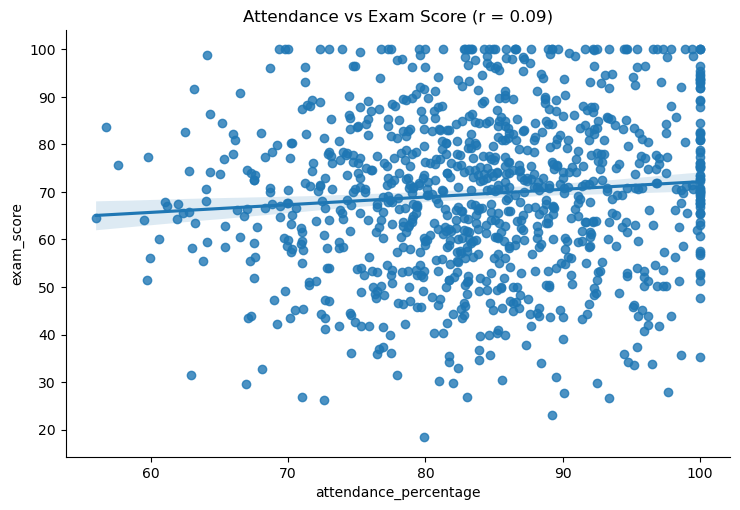

In [61]:
att_corr = round(df["attendance_percentage"].corr(df["exam_score"]),2)
print(att_corr)
sns.lmplot(x="attendance_percentage", y="exam_score", data=df, height=5, aspect =1.5)
plt.title('Attendance vs Exam Score (r = 0.09)')

A correlation coefficient of 0.09 between attendance percentage and exam score indicates a very weak positive relationship.
The value 0.09 is very close to 0, showing a weak correlation. This means there’s little to no meaningful linear relationship between attendance percentage and exam scores.

Q3: Does getting more sleep correlate with better mental health?

-0.01


Text(0.5, 1.0, 'Attendance vs Exam Score (r = -0.01)')

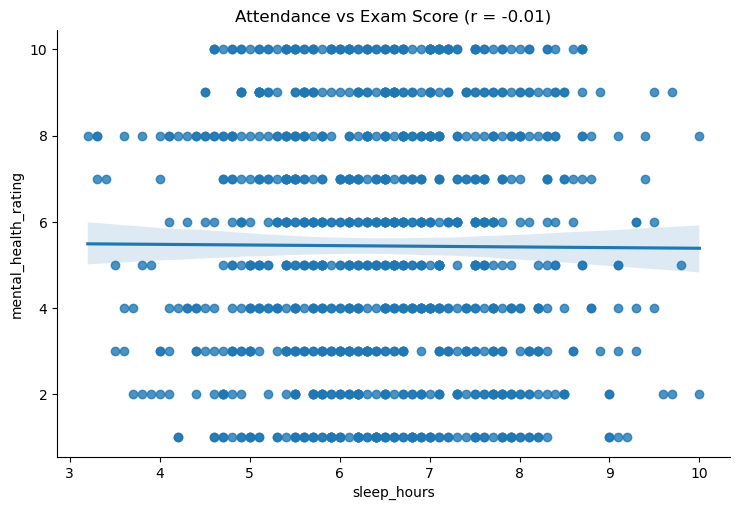

In [67]:
mental_corr = round(df["sleep_hours"].corr(df["mental_health_rating"]),2)
print(mental_corr)
sns.lmplot(x="sleep_hours", y="mental_health_rating", data=df, height=5, aspect =1.5)
plt.title('Attendance vs Exam Score (r = -0.01)')

A correlation coefficient of -0.01 between sleep hours and mental health rating indicates a very weak negative relationship.
The value -0.01 is very close to 0, showing a weak correlation. This means there’s little to no meaningful linear relationship between sleep hours and mental health rating.

Q4: Are higher screen time habits linked to lower performance?

Correlation between Social Media Hours and Exam Score: -0.17
Correlation between Netflix Hours and Exam Score: -0.17


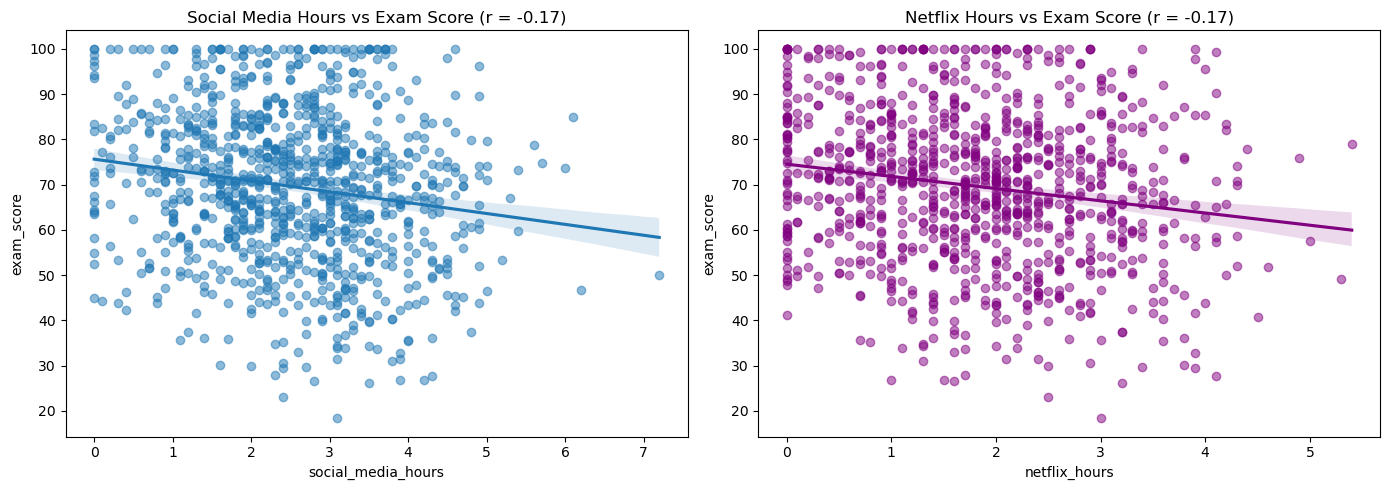

In [75]:
social_corr = round(df["social_media_hours"].corr(df["exam_score"]),2)   
netflix_corr = round(df["netflix_hours"].corr(df["exam_score"]),2)
print(f"Correlation between Social Media Hours and Exam Score: {social_corr}")
print(f"Correlation between Netflix Hours and Exam Score: {netflix_corr}")

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.regplot(x='social_media_hours', y='exam_score', data=df, scatter_kws={'alpha':0.5})
plt.title(f'Social Media Hours vs Exam Score (r = {social_corr})')

# Netflix vs Exam Score
plt.subplot(1, 2, 2)
sns.regplot(x='netflix_hours', y='exam_score', data=df, scatter_kws={'alpha':0.5}, color='purple')
plt.title(f'Netflix Hours vs Exam Score (r = {netflix_corr})')
plt.tight_layout()
plt.show()

The value -0.17 is close to 0, showing a weak correlation. This means there’s a slight linear relationship between screen time habits and exam scores, but it’s not strong.  The negative sign (-0.17) indicates a negative relationship—more screen time is associated with slightly lower exam scores.

Q5: Do students with better health habits score higher?

Lets first take a look of how the diet quality column is represented in our dataset: 

In [91]:
print("Unique values in diet_quality:", df['diet_quality'].unique())

Unique values in diet_quality: ['Fair' 'Good' 'Poor']


Now that we know the values, lets transform them to find a correlation with the exam score column. 

In [89]:
df["diet_quality_ranked"] = df["diet_quality"].map({"Poor":1, "Fair": 2, "Good" : 3})
correlation, p_value = stats.spearmanr(df["diet_quality_ranked"], df["exam_score"])
print(f"Spearmans´s correlation coefficient: {correlation:.3f}")

Spearmans´s correlation coefficient: 0.014


A correlation of 0.014 suggests that diet quality has almost no effect on exam scores in your dataset, and you should explore other factors for more meaningful insights.

Q6: Is physical activity associated with well-being?

In [86]:
exercise_corr = round(df["exercise_frequency"].corr(df["exam_score"]),2)
print(exercise_corr)

0.16


With such a low correlation, exercise frequency isn’t a major factor in determining exam performance. 

Q7: Are there noticeable trends in study habits or scores by gender?

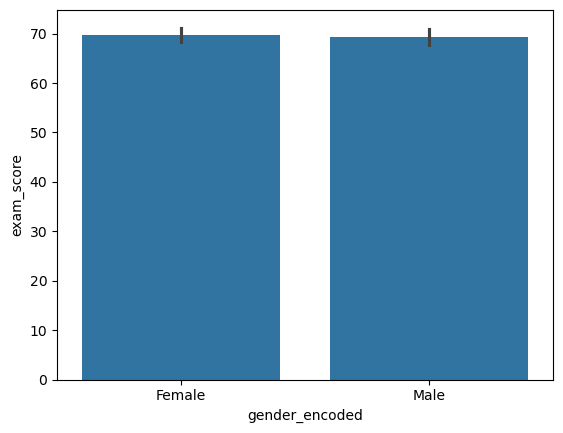


Male average exam score: 69.37

Female average exam score: 69.74


In [141]:
df_binary = df[df['gender'].isin(['Female', 'Male'])].copy()

# Encode gender as binary (0 = Female, 1 = Male)
df_binary['gender_encoded'] = df_binary['gender'].map({'Female': 0, 'Male': 1})

sns.barplot(x="gender_encoded", y="exam_score", data=df_binary)
plt.xticks([0, 1], ['Female', 'Male'])  # Customize labels
plt.show()

male_avg = round(df_binary[df_binary["gender_encoded"] == 1]["exam_score"].mean(),2)
female_avg = round(df_binary[df_binary["gender_encoded"] == 0]["exam_score"].mean(),2)
print("\nMale average exam score:", male_avg)
print("\nFemale average exam score:", female_avg)

Q8: Do students with highly educated parents perform better?

In [146]:
print("Parental education level:", df["parental_education_level"].unique())
df_cleaned = df.dropna(subset=["parental_education_level"]).copy()
df_cleaned["parental_education_ranked"] = df_cleaned["parental_education_level"].map({"Master": 1, "Bachelor" : 2, "High School" : 3})
parental_corr =  df_cleaned["parental_education_ranked"].corr(df_cleaned["exam_score"])
print(parental_corr)

Parental education level: ['Master' 'High School' 'Bachelor' nan]
0.02109337539701165
